# Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

In [2]:
data = pd.read_csv("Austin_Animal_Shelter_Dataset.csv")

data.size

876848

In [3]:
columns = data.columns.values.tolist()

print(columns)

['Animal ID', 'Name', 'Date of Birth', 'Intake Date', 'Intake Time', 'Intake Age in Days', 'Intake Age in Weeks', 'Intake Age in Months', 'Intake Age in Years', 'Outcome Date', 'Outcome Time', 'Outcome Age in Days', 'Outcome Age in Weeks', 'Outcome Age in Months', 'Outcome Age in Years', 'Length of Stay in Days', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex at Intake', 'Outcome', 'Outcome Subtype', 'Sex at Outcome', 'Altered at Shelter', 'Original Breed', 'Collapsed Breed', 'Color']


# Preparing Data

## Our model only needs entries that have 'Adoption' or 'Euthanasia' as their outcome

In [4]:
data1 = data[(data['Outcome']=='Adoption') ]
data2 = data[(data['Outcome'] == 'Euthanasia')]

pruned_data = [data1, data2]

pruned_data = pd.concat(pruned_data, sort=False)

pruned_data.size

448336

## Checking for missing values

In [5]:
pruned_data.isna().sum()

Animal ID                     0
Name                       4371
Date of Birth                 0
Intake Date                   0
Intake Time                   0
Intake Age in Days            0
Intake Age in Weeks           0
Intake Age in Months          0
Intake Age in Years           0
Outcome Date                  0
Outcome Time                  0
Outcome Age in Days           0
Outcome Age in Weeks          0
Outcome Age in Months         0
Outcome Age in Years          0
Length of Stay in Days        0
Found Location                0
Intake Type                   0
Intake Condition              0
Animal Type                   0
Sex at Intake                 0
Outcome                       0
Outcome Subtype           11044
Sex at Outcome                0
Altered at Shelter            0
Original Breed                0
Collapsed Breed               0
Color                         0
dtype: int64

## Deleting unneeded Columns

In [6]:
pruned_data.pop('Name')
pruned_data.pop('Intake Date')
pruned_data.pop('Intake Time')
pruned_data.pop('Intake Age in Days')
pruned_data.pop('Intake Age in Weeks')
pruned_data.pop('Outcome Date')
pruned_data.pop('Outcome Time')
pruned_data.pop('Outcome Age in Days')
pruned_data.pop('Outcome Age in Weeks')
pruned_data.pop('Outcome Age in Years')
pruned_data.pop('Found Location')

pruned_data.head()

,Animal ID,Date of Birth,Intake Age in Months,Intake Age in Years,Outcome Age in Months,Length of Stay in Days,Intake Type,Intake Condition,Animal Type,Sex at Intake,Outcome,Outcome Subtype,Sex at Outcome,Altered at Shelter,Original Breed,Collapsed Breed,Color
8,A818975,5/19/2020,0,0,2,35.0,Stray,Normal,Cat,Intact Male,Adoption,Foster,Neutered Male,Y,Domestic Shorthair,Domestic Shorthair,Cream Tabby
11,A760053,10/11/2015,24,2,24,4.0,Stray,Normal,Dog,Intact Male,Adoption,NaN,Neutered Male,Y,Chihuahua Shorthair,Chihuahua Shorthair,White/Tan
12,A707375,1/11/2015,6,0,10,140.0,Stray,Normal,Dog,Intact Female,Adoption,NaN,Spayed Female,Y,Pit Bull,Pit Bull,Brown/White
13,A696408,2/4/2013,24,2,27,113.0,Stray,Normal,Dog,Intact Female,Adoption,Foster,Spayed Female,Y,Chihuahua Shorthair,Chihuahua Shorthair,Tricolor
16,A657188,6/24/1999,172,14,175,77.0,Owner Surrender,Normal,Cat,Neutered Male,Adoption,Foster,Neutered Male,N,Domestic Shorthair Mix,Domestic Shorthair Mix,Brown Tabby/White


## One hot encoding

In [7]:
pruned_data = pd.get_dummies(pruned_data, columns = ['Intake Type'])
pruned_data = pd.get_dummies(pruned_data, columns = ['Animal Type'])
pruned_data = pd.get_dummies(pruned_data, columns = ['Sex at Outcome'])
pruned_data = pd.get_dummies(pruned_data, columns = ['Sex at Intake'])
pruned_data = pd.get_dummies(pruned_data , columns = ['Collapsed Breed'] )

columns = pruned_data.columns.values.tolist()
print(columns)

['Animal ID', 'Date of Birth', 'Intake Age in Months', 'Intake Age in Years', 'Outcome Age in Months', 'Length of Stay in Days', 'Intake Condition', 'Outcome', 'Outcome Subtype', 'Altered at Shelter', 'Original Breed', 'Color', 'Intake Type_Abandoned', 'Intake Type_Euthanasia Request', 'Intake Type_Owner Surrender', 'Intake Type_Public Assist', 'Intake Type_Stray', 'Intake Type_Wildlife', 'Animal Type_Bird', 'Animal Type_Cat', 'Animal Type_Dog', 'Animal Type_Livestock', 'Animal Type_Other', 'Sex at Outcome_Intact Female', 'Sex at Outcome_Intact Male', 'Sex at Outcome_Neutered Male', 'Sex at Outcome_Spayed Female', 'Sex at Outcome_Unknown', 'Sex at Intake_Intact Female', 'Sex at Intake_Intact Male', 'Sex at Intake_Neutered Male', 'Sex at Intake_Spayed Female', 'Sex at Intake_Unknown', 'Collapsed Breed_Abyssinian', 'Collapsed Breed_Abyssinian Mix', 'Collapsed Breed_Affenpinscher Mix', 'Collapsed Breed_Afghan Hound Mix', 'Collapsed Breed_Airedale Terrier Mix', 'Collapsed Breed_Akbash Mix'

## Specific Features used for model Uncomment to see different results

In [8]:
intake_type_cols = ['Intake Type_Abandoned', 'Intake Type_Euthanasia Request', 'Intake Type_Owner Surrender', 'Intake Type_Public Assist', 'Intake Type_Stray' , 'Intake Type_Wildlife']
animal_type_cols = ['Animal Type_Bird', 'Animal Type_Cat', 'Animal Type_Dog', 'Animal Type_Livestock', 'Animal Type_Other']
sex_out_cols = ['Sex at Outcome_Intact Female', 'Sex at Outcome_Intact Male' , 'Sex at Outcome_Neutered Male', 'Sex at Outcome_Spayed Female', 'Sex at Outcome_Unknown']
sex_in_cols = ['Sex at Intake_Intact Female', 'Sex at Intake_Intact Male' , 'Sex at Intake_Neutered Male', 'Sex at Intake_Spayed Female', 'Sex at Intake_Unknown']
cols = ['Length of Stay in Days'] + intake_type_cols
#cols = ['Length of Stay in Days']
#cols = sex_in_cols + intake_type_cols 
print(cols)

['Length of Stay in Days', 'Intake Type_Abandoned', 'Intake Type_Euthanasia Request', 'Intake Type_Owner Surrender', 'Intake Type_Public Assist', 'Intake Type_Stray', 'Intake Type_Wildlife']


### Need to fix some length of stay to be positive since income and outcome where swapped

In [9]:
pruned_data.head()

,Animal ID,Date of Birth,Intake Age in Months,Intake Age in Years,Outcome Age in Months,Length of Stay in Days,Intake Condition,Outcome,Outcome Subtype,Altered at Shelter,...,Collapsed Breed_Welsh Springer Spaniel Mix,Collapsed Breed_Welsh Terrier,Collapsed Breed_Welsh Terrier Mix,Collapsed Breed_West Highland,Collapsed Breed_West Highland Mix,Collapsed Breed_Whippet Mix,Collapsed Breed_Wire Hair Fox Terrier,Collapsed Breed_Wire Hair Fox Terrier Mix,Collapsed Breed_Yorkshire Terrier,Collapsed Breed_Yorkshire Terrier Mix
8,A818975,5/19/2020,0,0,2,35.0,Normal,Adoption,Foster,Y,...,0,0,0,0,0,0,0,0,0,0
11,A760053,10/11/2015,24,2,24,4.0,Normal,Adoption,NaN,Y,...,0,0,0,0,0,0,0,0,0,0
12,A707375,1/11/2015,6,0,10,140.0,Normal,Adoption,NaN,Y,...,0,0,0,0,0,0,0,0,0,0
13,A696408,2/4/2013,24,2,27,113.0,Normal,Adoption,Foster,Y,...,0,0,0,0,0,0,0,0,0,0
16,A657188,6/24/1999,172,14,175,77.0,Normal,Adoption,Foster,N,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def to_abs( row):
  row['Length of Stay in Days'] = abs(row['Length of Stay in Days'])
  return row
  #print(row['Length of Stay in Days'], abs(row['Length of Stay in Days']) )

def delete_negatives (row):
  if row['Length of Stay in Days'] >= 0 :
    return row

pruned_data = pruned_data.apply(to_abs, axis =1 )

# adopted_pets = adopted_pets.apply(to_abs, axis =1 )
# euthanized_pets = euthanized_pets.apply(to_abs, axis =1 )

In [11]:
pruned_data = pruned_data.loc[pruned_data['Intake Age in Months'] != '#NUM!']
pruned_data['Intake Age in Months'] = pd.to_numeric(pruned_data['Intake Age in Months'])
pruned_data = pruned_data.loc[pruned_data['Outcome Age in Months'] != '#NUM!']
pruned_data['Outcome Age in Months'] = pd.to_numeric(pruned_data['Outcome Age in Months'])
pruned_data['Outcome Age in Months'].unique()

array([  2,  24,  10,  27, 175,   5,  55,  48,  42,   6,  96,   3,  12,
         4,  91,  22,  19,  13,  36,  25,  26,   7,   1,  46,  28,  60,
         8, 106,  52,  74,  14,  71,  61,  18,  11,   9,  72, 111,  17,
        29,  64,  84, 133,  38,  32,  66,  53,  75,  31, 121,  37,  21,
       116,  43,  62,  47,  15,  49,  95,  41,  33,  39, 120,  16,  81,
        54, 185,  23,  98,  73, 156,  34,  79, 186, 102,  57, 104, 180,
       136,  76,  20,  89, 181, 112,  30,  78,  35, 107, 141, 110,  90,
        45, 108, 144, 114, 105,  88,  51, 135,  69, 192, 117,  87,  77,
       130,  50, 143, 124,  40,  63, 166, 161, 137, 204, 177, 147, 109,
        97, 119, 132,  86,  70,  80, 125,  85,  83, 196,  56, 101,  59,
        65, 122, 123,  58, 149, 193, 163, 113,  44,  99,  67, 155, 126,
       146, 150, 168,  94, 103, 179, 169, 134, 115, 127, 157, 128, 218,
       145, 189,  92, 165, 176, 170,  93, 159, 100,   0,  68, 158, 154,
       178,  82, 191, 148, 142, 138, 190, 131, 129, 162, 139, 17

## Seperating outcome as our target

In [12]:
pruned_target = pruned_data['Outcome']
pruned_features = pruned_data[cols]


In [13]:
pruned_features.head()

,Length of Stay in Days,Intake Type_Abandoned,Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife
8,35.0,0,0,0,0,1,0
11,4.0,0,0,0,0,1,0
12,140.0,0,0,0,0,1,0
13,113.0,0,0,0,0,1,0
16,77.0,0,0,1,0,0,0


# Data visualization

## Comparing Length of Stay to outcome

In [14]:
adopted_pets = pruned_data[ (pruned_data['Outcome'] == 'Adoption')]
euthanized_pets = pruned_data[ (pruned_data['Outcome'] == 'Euthanasia')]

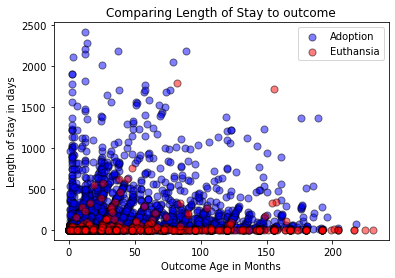

In [15]:
plt.scatter(adopted_pets['Outcome Age in Months'] , adopted_pets['Length of Stay in Days'], s = 50, facecolors = 'blue', edgecolors= 'black', alpha = 0.5 )
plt.scatter(euthanized_pets['Outcome Age in Months'],  euthanized_pets['Length of Stay in Days'] ,s=50, facecolors = 'red', edgecolors= 'black', alpha = 0.5 )

plt.ylabel('Length of stay in days')
plt.xlabel('Outcome Age in Months')
plt.legend(['Adoption', 'Euthansia'], loc="best")
plt.title('Comparing Length of Stay to outcome')
plt.show()

In [16]:
print(adopted_pets['Length of Stay in Days'].mean())
print(euthanized_pets['Length of Stay in Days'].mean())

print()

print(adopted_pets['Outcome Age in Months'].mean())
print(euthanized_pets['Outcome Age in Months'].mean())

57.587435841827514
9.090529247910863

20.896624015036508
29.686629526462397


# Running model 25 times and storing euthanasia precision

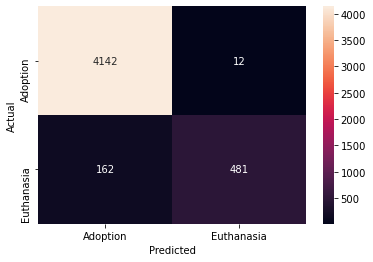

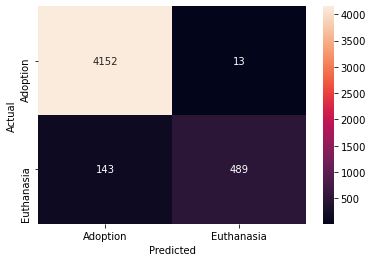

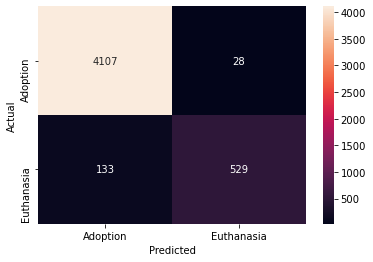

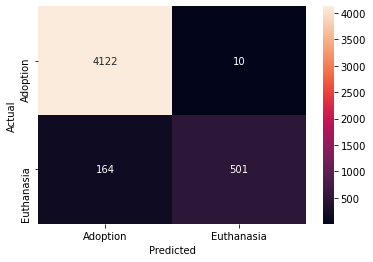

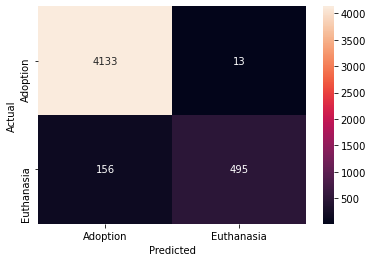

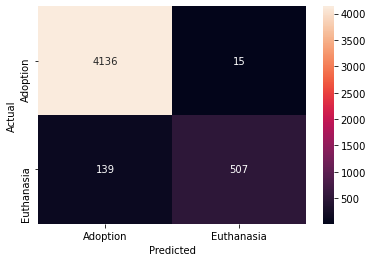

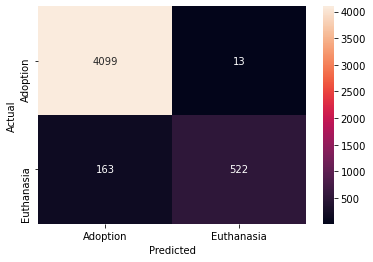

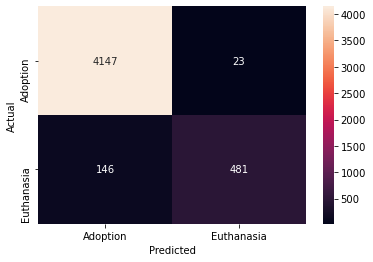

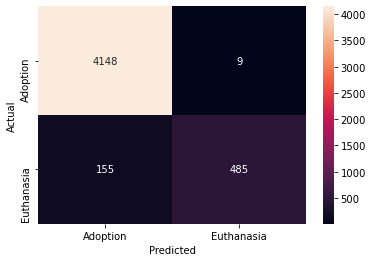

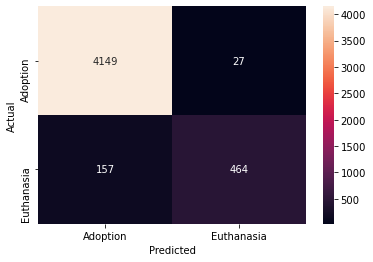

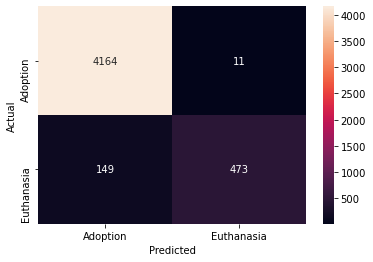

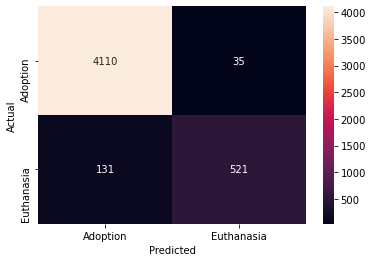

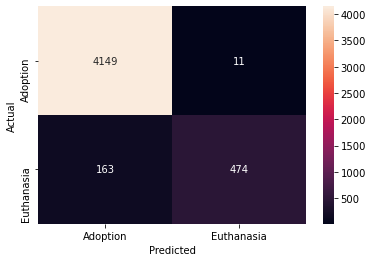

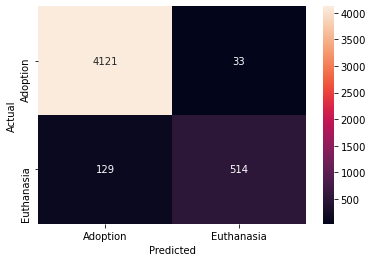

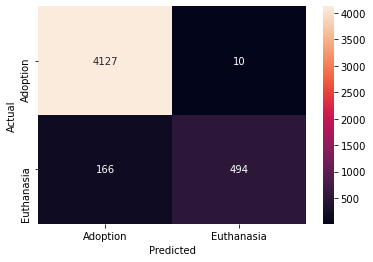

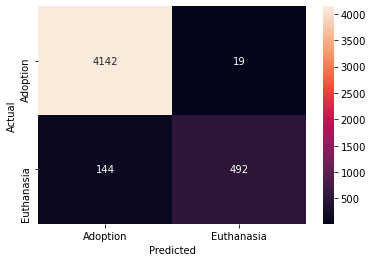

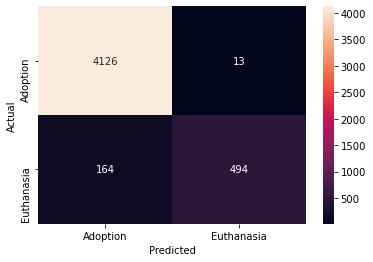

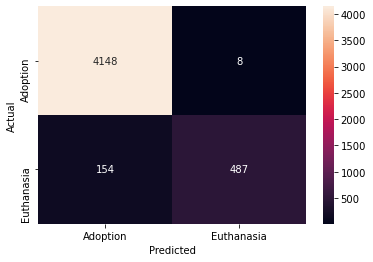

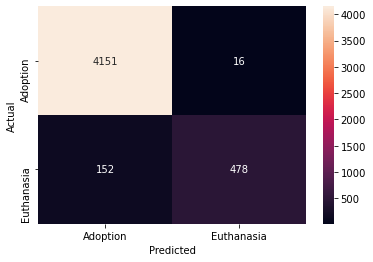

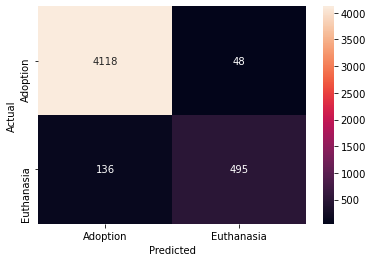

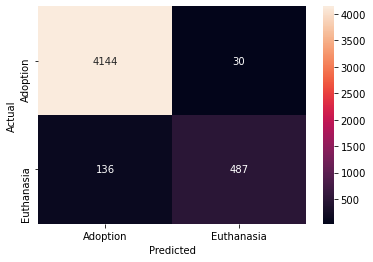

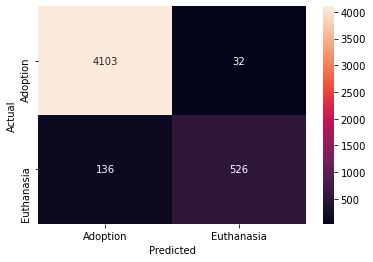

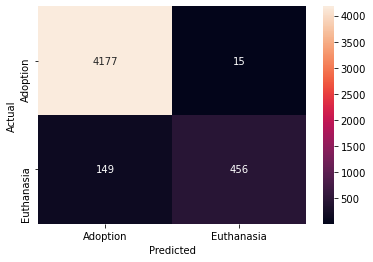

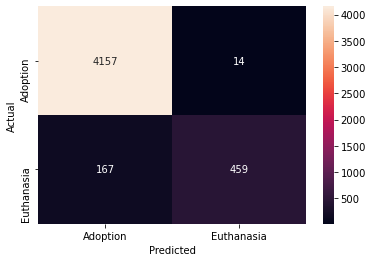

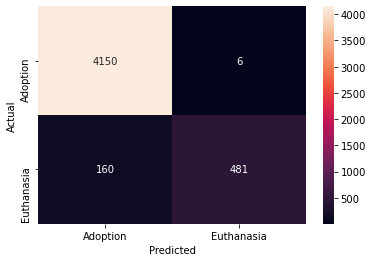

List of each run's precision:  [0.7480559875583204, 0.7737341772151899, 0.7990936555891238, 0.7533834586466165, 0.7603686635944701, 0.7848297213622291, 0.762043795620438, 0.7671451355661882, 0.7578125, 0.7471819645732689, 0.7604501607717041, 0.799079754601227, 0.7441130298273155, 0.7993779160186625, 0.7484848484848485, 0.7735849056603774, 0.7507598784194529, 0.7597503900156006, 0.7587301587301587, 0.7844690966719493, 0.7817014446227929, 0.7945619335347432, 0.7537190082644628, 0.7332268370607029, 0.750390015600624]
mean precision: 0.7658419375204185


In [17]:
accuracies = []
for runs in range( 0 , 25):
  x_train,x_test,y_train,y_test = train_test_split( pruned_features, pruned_target, test_size=0.3)
  model = KNeighborsClassifier(n_neighbors= 20)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  accuracy_count = 0
  euthanasia_count = 0
  euthanasia_actual = 0 

  y_test_as_list = y_test.to_list()

  for i in range(len(y_test_as_list)):
    if y_test_as_list[i] == 'Euthanasia':
      euthanasia_actual +=1


  for i in range(len(pred)): 
    if pred[i] == y_test_as_list[i]:
      accuracy_count += 1
      if pred[i] == 'Euthanasia':
        euthanasia_count += 1
  accuracies.append(euthanasia_count/euthanasia_actual)
  confusion_data = {
      'y_Actual': y_test_as_list,
      'y_Predicted': pred
  }

  confusion_df = pd.DataFrame(confusion_data, columns=['y_Actual','y_Predicted'])

  confusion_matrix = pd.crosstab(confusion_df['y_Actual'], confusion_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

  sn.heatmap(confusion_matrix, annot=True, fmt='d')
  plt.show()

print("List of each run's precision: ",accuracies)
print("mean precision:", (sum(accuracies) / len(accuracies) ))

# Sources

https://www.askpython.com/python/examples/split-data-training-and-testing-set#:~:text=%20How%20to%20split%20training%20and%20testing%20data,2%20Split%20the%20data%20using%20sklearn%20More%20